In [13]:
# MIT License

# Copyright (c) 2017 Johannes Dollinger

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

# https://github.com/emulbreh/bridson

from random import random
from math import cos, sin, floor, sqrt, pi, ceil

def euclidean_distance(a, b):
    dx = a[0] - b[0]
    dy = a[1] - b[1]
    return sqrt(dx * dx + dy * dy)

def poisson_disc_samples(width, height, r, k=5, distance=euclidean_distance, random=random):
    tau = 2 * pi
    cellsize = r / sqrt(2)

    grid_width = int(ceil(width / cellsize))
    grid_height = int(ceil(height / cellsize))
    grid = [None] * (grid_width * grid_height)

    def grid_coords(p):
        return int(floor(p[0] / cellsize)), int(floor(p[1] / cellsize))

    def fits(p, gx, gy):
        yrange = list(range(max(gy - 2, 0), min(gy + 3, grid_height)))
        for x in range(max(gx - 2, 0), min(gx + 3, grid_width)):
            for y in yrange:
                g = grid[x + y * grid_width]
                if g is None:
                    continue
                if distance(p, g) <= r:
                    return False
        return True

    p = width * random(), height * random()
    queue = [p]
    grid_x, grid_y = grid_coords(p)
    grid[grid_x + grid_y * grid_width] = p

    while queue:
        qi = int(random() * len(queue))
        qx, qy = queue[qi]
        queue[qi] = queue[-1]
        queue.pop()
        for _ in range(k):
            alpha = tau * random()
            d = r * sqrt(3 * random() + 1)
            px = qx + d * cos(alpha)
            py = qy + d * sin(alpha)
            if not (0 <= px < width and 0 <= py < height):
                continue
            p = (px, py)
            grid_x, grid_y = grid_coords(p)
            if not fits(p, grid_x, grid_y):
                continue
            queue.append(p)
            grid[grid_x + grid_y * grid_width] = p
    return [p for p in grid if p is not None]

len(poisson_disc_samples(1000, 1000, 61, k=5))

133

In [10]:
import random

from geopy.distance import geodesic

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'font.weight': 'bold'})

In [21]:
import random
import kdtree
import sys
from math import cos, sin, floor, sqrt, pi, ceil, radians

debug = False

def saveNedFile(fileName, networkName, nodeMap, mapHeightM):
    template = open("nedGenTemplate.txt", "r")
    templateTxt = template.read()
    templateTxt = templateTxt.replace('##{NETWORK_NAME}##', networkName)
    templateTxt = templateTxt.replace('##{BGB}##', str(mapHeightM) + ',' + str(mapHeightM))
    
    df = pd.DataFrame(data=reversed(nodeMap))
    maximum_x_value = df['x'].max()
    minimum_x_value = df['x'].min()
    maximum_y_value = df['y'].max()
    minimum_y_value = df['y'].min()
    
    scale = 1
    
    nodesStr = ''
    i = 1
    for node in nodeMap:
        nodeText = '\n    sensors_' + str(i) + ': MobileSensorNode {'
        nodeText = nodeText + '\n        @display("i=misc/sensor;p=' + "{:.2f}".format((node['x'])*scale) + ',' + "{:.2f}".format((mapHeightM - node['y'])*scale) + '");'
        nodeText = nodeText + '\n    }\n'
        nodesStr = nodesStr + nodeText
        i = i + 1
    
    templateTxt = templateTxt.replace('##{NODES}##', nodesStr)
    
    f = open(fileName, "w")
    f.write(templateTxt)
    f.close()

def toRadians(degrees):
    return degrees * pi / 180

def toDegrees(radians):
    return radians * 180 / pi

def saveIniFile(networkNames, nodeMaps):
    template = open("iniGenTemplate.txt", "r")
    templateTxt = template.read()
    
    output = open("dadcaAckSim.ini", "w")
    
    fileContent = ''
    
    for networkName in networkNames:
        templateTxtTemp = templateTxt
        templateTxtTemp = templateTxtTemp.replace('##{NETWORK_NAME}##', networkName)

        nodeMap = nodeMaps[networkName]
        nodePositionsIniStr = ''
        sensorI = 1
        
        iniLat = -15.8401
        iniLon = -47.9266
    
        for node in nodeMap:
            
            # Translate from iniLat,iniLon to a new latitude adding the (x,y) points.
            #origin = (iniLat, iniLon)
            #destination = geodesic(kilometers=(node['y'] / 1000), bearing=0).destination(origin, node['x'] / 1000)
            #lat = destination.latitude
            #lon = destination.longitude
            
                        
            #lat = toRadians(iniLat) + node['y'] / (40007000.0 / (2.0 * pi))
            #lon = toRadians(iniLon) + node['x'] / ((40075000.0 / (2.0 * pi)) * cos(toRadians(iniLat)))

            #lat = toDegrees(lat)
            #lon = toDegrees(lon)
            
            # https://gis.stackexchange.com/questions/2951/algorithm-for-offsetting-a-latitude-longitude-by-some-amount-of-meters
                        
            #Earth’s radius, sphere
            #R=6378137
            
            #offsets in meters
            #dn = node['y']
            #de = node['x']
            
            #Coordinate offsets in radians
            #dLat = dn/R
            #dLon = de/(R*cos(pi*iniLat/180))
            
            #OffsetPosition, decimal degrees
            #lat = iniLat + dLat * 180/pi
            #lon = iniLon + dLon * 180/pi 

            #lat_degrees_per_meter = 1 / 111320.0
            #lon_degrees_per_meter = 1 / (40075000.0 / 360.0)

            #lat = iniLat + (node['y'] * lat_degrees_per_meter)
            #lon = iniLon + (node['x'] * lon_degrees_per_meter)

            ##

            # Base latitude and longitude
            base_latitude = radians(iniLat)
            base_longitude = radians(iniLon)
            
            # Earth's radius in meters
            earth_radius = 6371000  # approximately 6371 km
            
            # Calculate the latitude difference per meter
            lat_diff_per_meter = 1 / earth_radius
            
            # Calculate the longitude difference per meter at the given latitude
            lon_diff_per_meter = 1 / (earth_radius * cos(base_latitude))

            # Convert meters to latitude and longitude offsets
            lat = iniLat + node['y'] * lat_diff_per_meter
            lon = iniLon + node['x'] * lon_diff_per_meter

            nodePositionsIniStr += '*.sensors_' + str(sensorI) + '.mobility.initialLatitude = %.8fdeg\n'%lat
            nodePositionsIniStr += '*.sensors_' + str(sensorI) + '.mobility.initialLongitude = %.8fdeg\n'%lon
            sensorI = sensorI + 1

        # Add node positions
        templateTxtTemp = templateTxtTemp.replace('##{S1-END}##', nodePositionsIniStr)
        templateTxtTemp = templateTxtTemp.replace('##{S2-END}##', nodePositionsIniStr)
        
        fileContent = fileContent + templateTxtTemp
    
    appendedIni = open("omnetpp.ini", "r")
    fileContent = fileContent + appendedIni.read()
    appendedIni.close()
    
    output.write(fileContent)
    output.close()
    
def getRandomPoint(mapWidthM, mapHeightM, startX, startY, minDistance, maxDistance):
    x = -1
    y = -1
    
    while x < 0 or y < 0 or x > mapWidthM or y > mapHeightM:
        targetDistance = random.uniform(minDistanceM,maxDistanceM)
        theta = random.random()*pi*2
        
        x = startX + cos(theta)*targetDistance;
        y = startY + sin(theta)*targetDistance;
    return [x,y]

def dist2(p1,p2):
    return sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )

# This class emulates a tuple, but contains a useful payload
class Item(object):
    def __init__(self, x, y, data):
        self.coords = (x, y)
        self.data = data

    def __len__(self):
        return len(self.coords)

    def __getitem__(self, i):
        return self.coords[i]

    def __repr__(self):
        return 'Item({}, {}, {})'.format(self.coords[0], self.coords[1], self.data)

def genMap(mapWidthM, mapHeightM, nodeCount, minDistanceM, maxDistanceM):
    
    print(str(nodeCount) + ' nodes.')

    poissonResult = poisson_disc_samples(1000, 1000, 61, k=5)

    nodeMap = []

    i = 0
    for node in poissonResult:
        if i >= nodeCount:
            break
            
        nodeMap.append({
            'x': node[0],
            'y': node[1],
            'mode': 'default'
        })
        i += 1

    if i != nodeCount:
        sys.exit('Error, i does not match node count. Exiting.')
            
    return nodeMap

20 nodes.


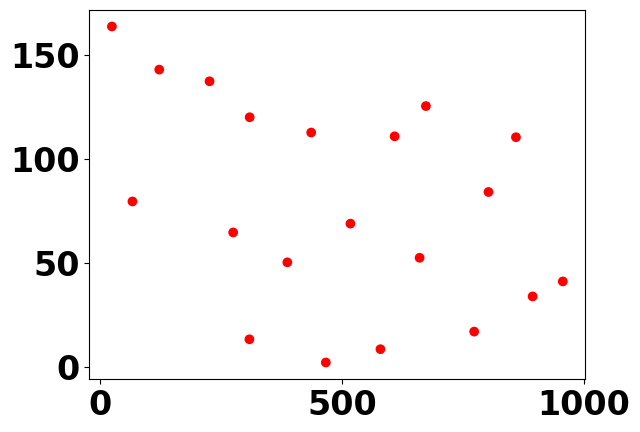

20 nodes.


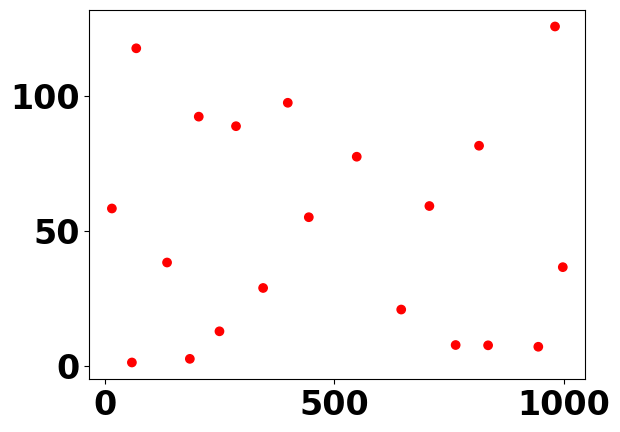

20 nodes.


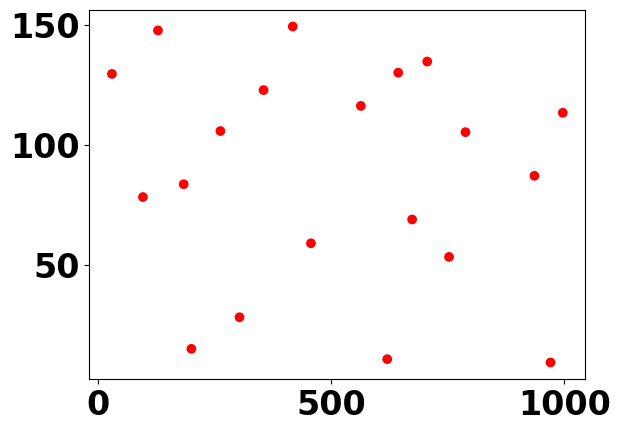

20 nodes.


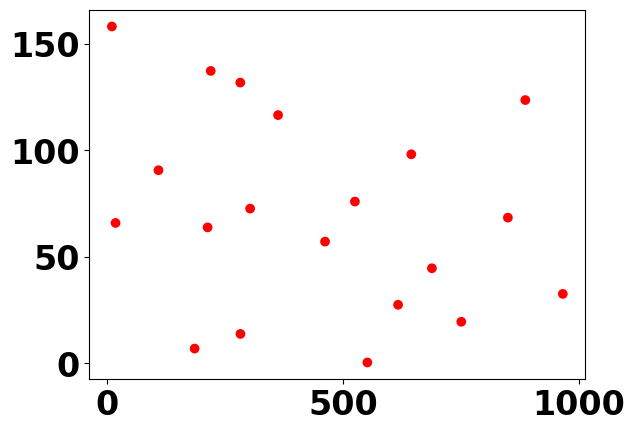

20 nodes.


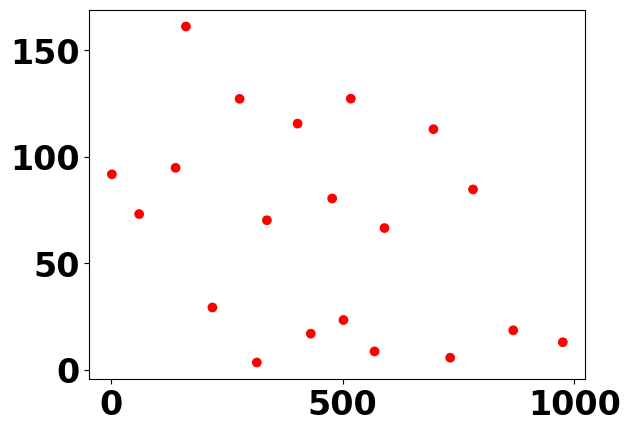

20 nodes.


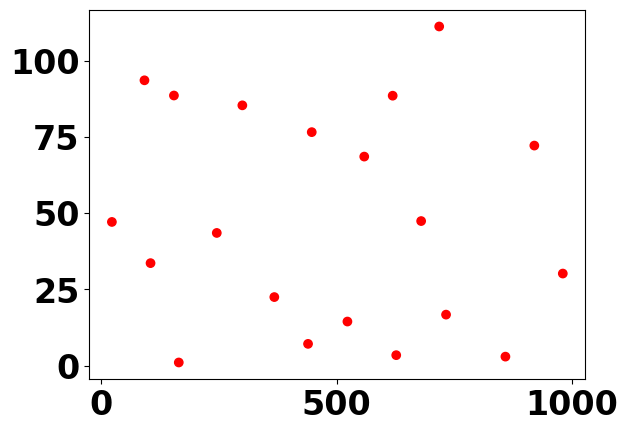

20 nodes.


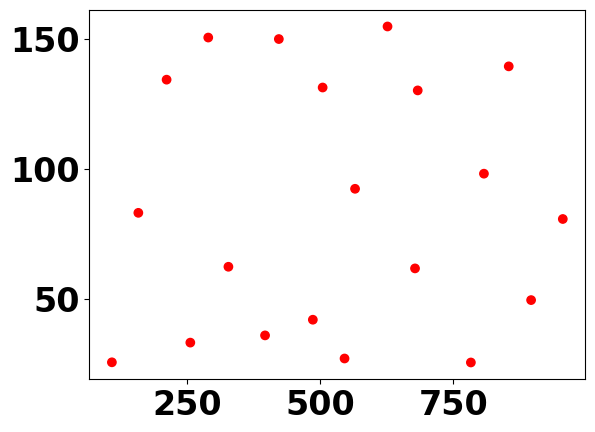

20 nodes.


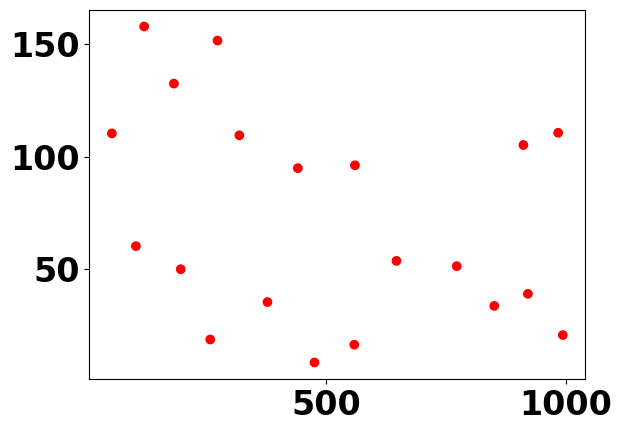

20 nodes.


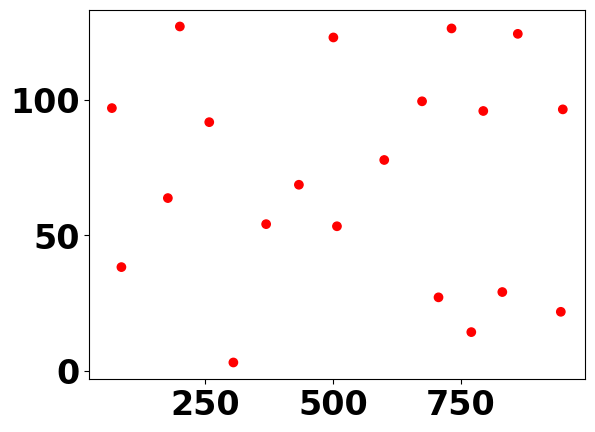

20 nodes.


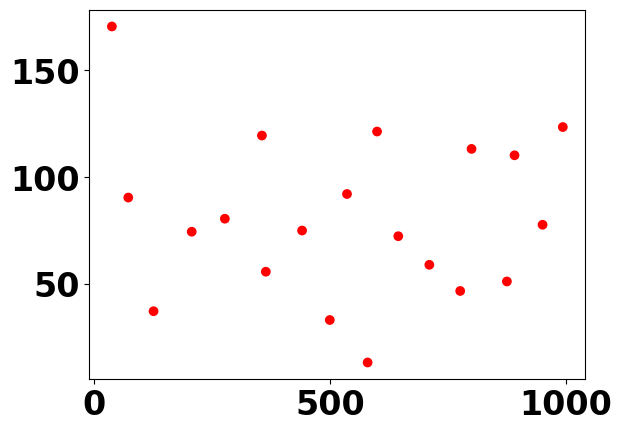

50 nodes.


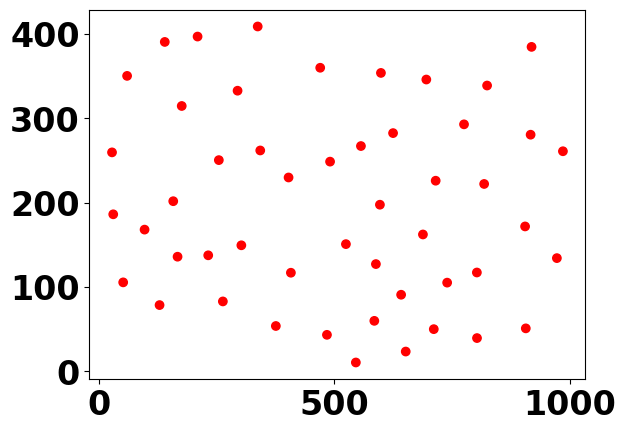

50 nodes.


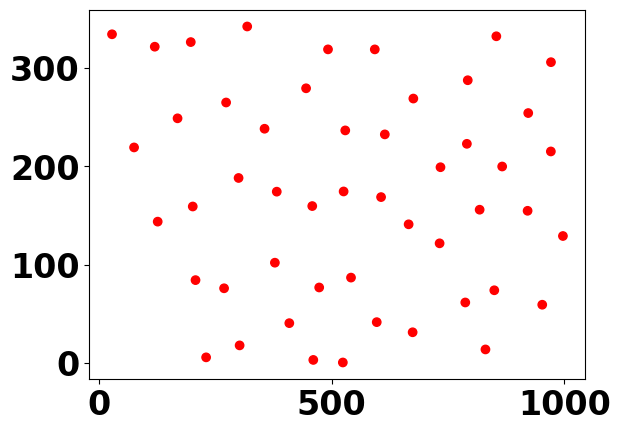

50 nodes.


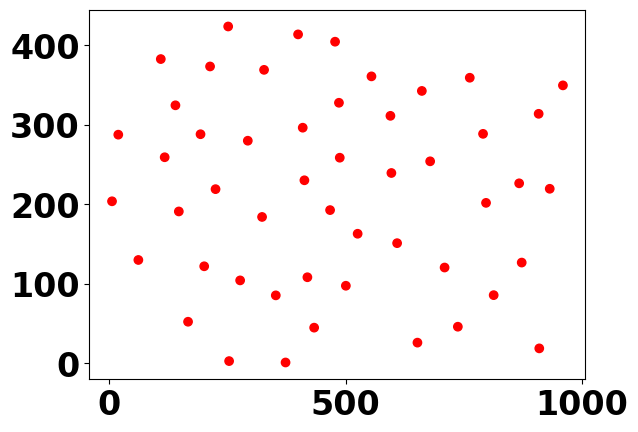

50 nodes.


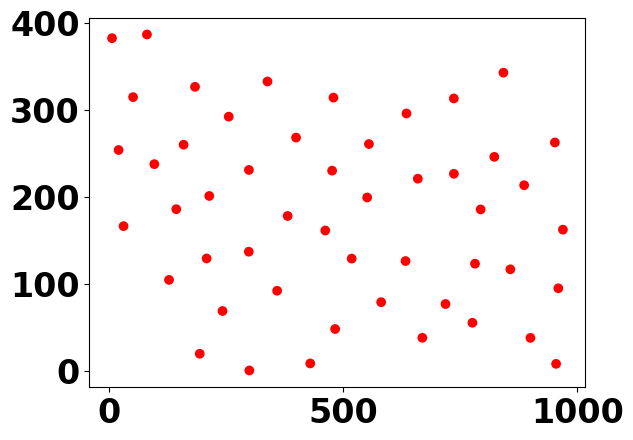

50 nodes.


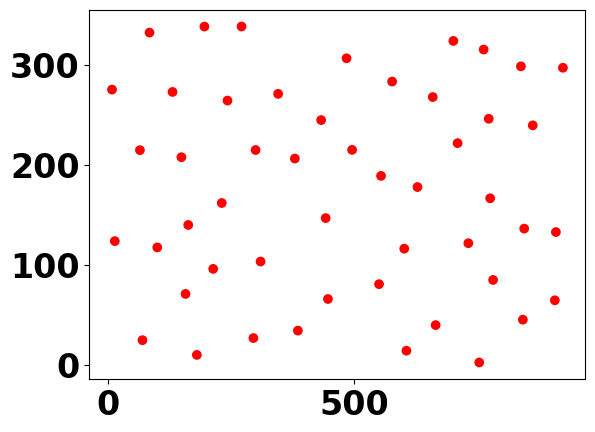

50 nodes.


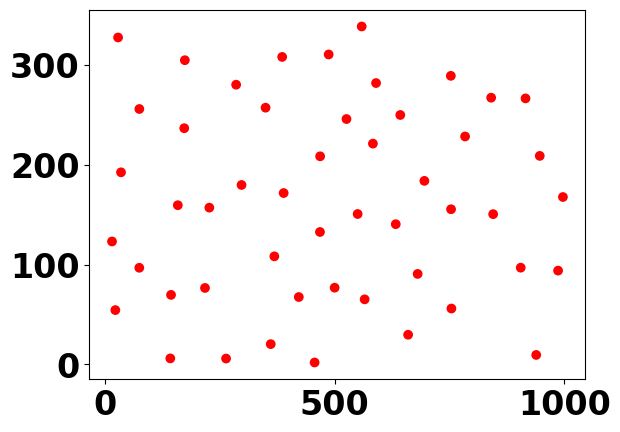

50 nodes.


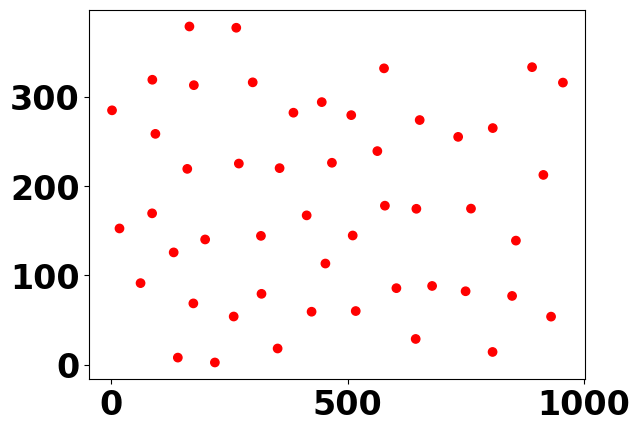

50 nodes.


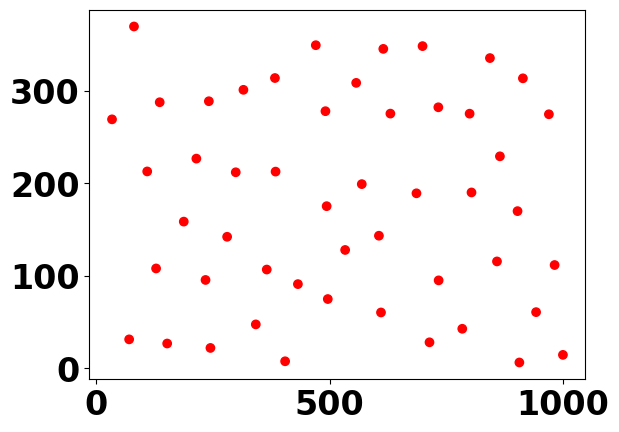

50 nodes.


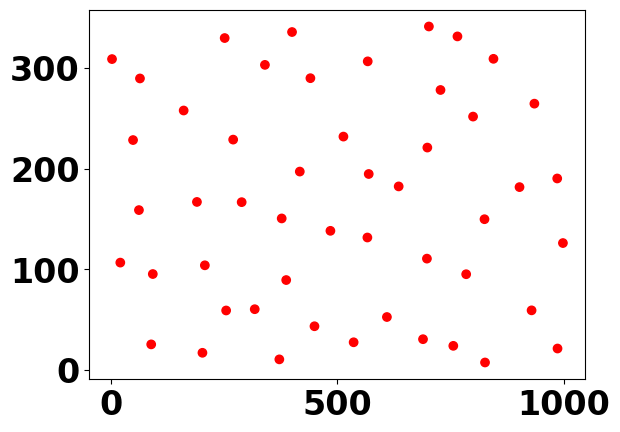

50 nodes.


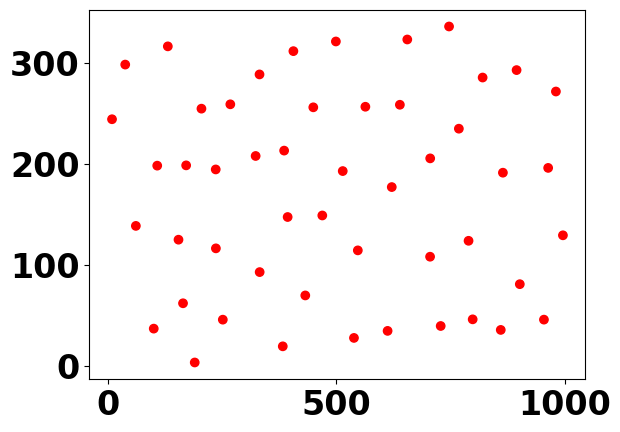

100 nodes.


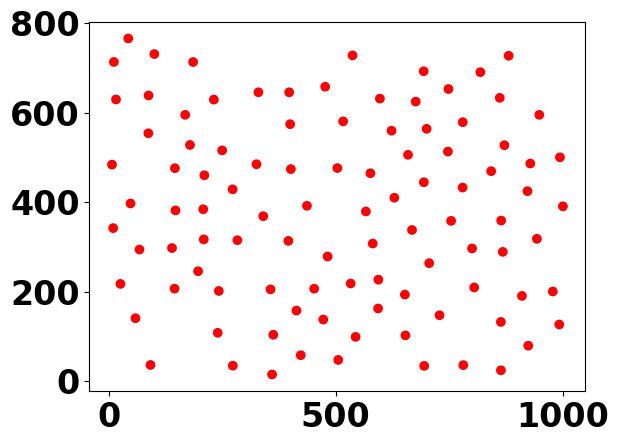

100 nodes.


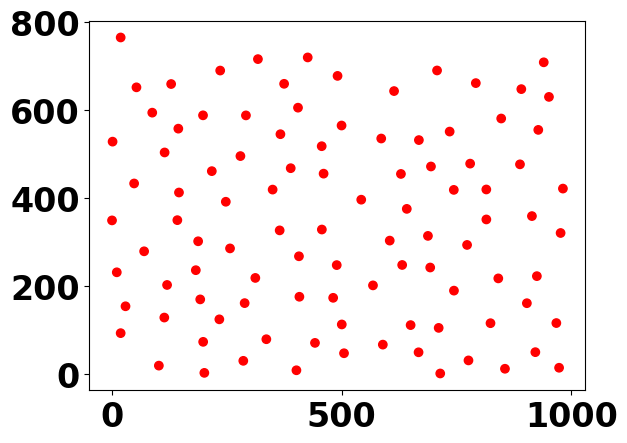

100 nodes.


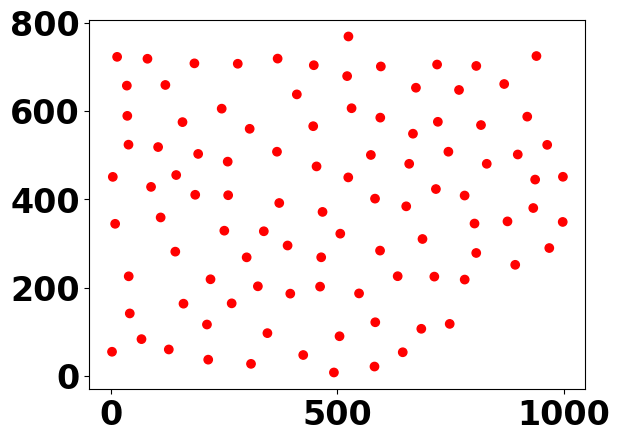

100 nodes.


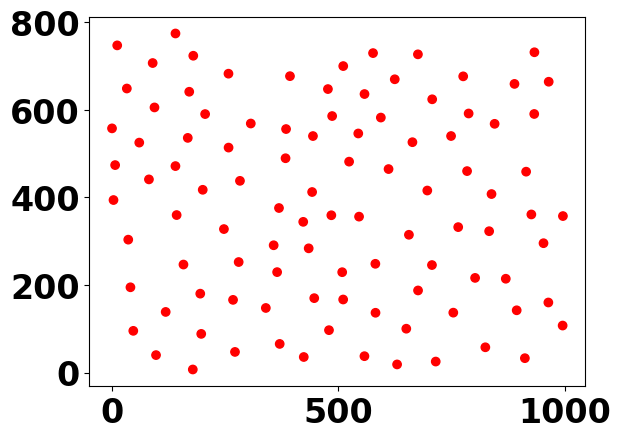

100 nodes.


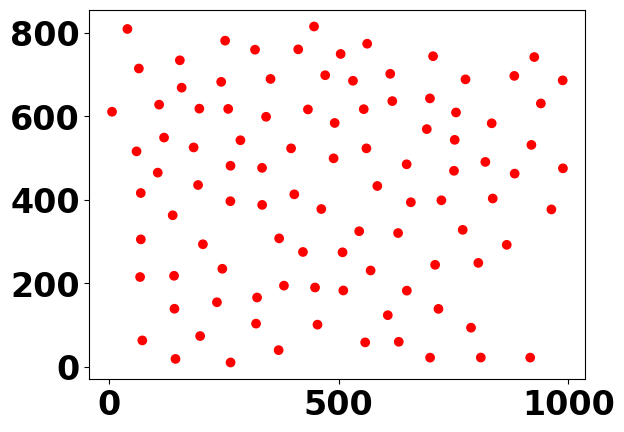

100 nodes.


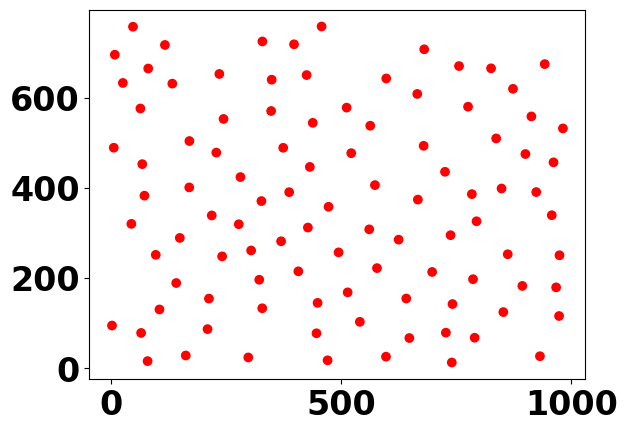

100 nodes.


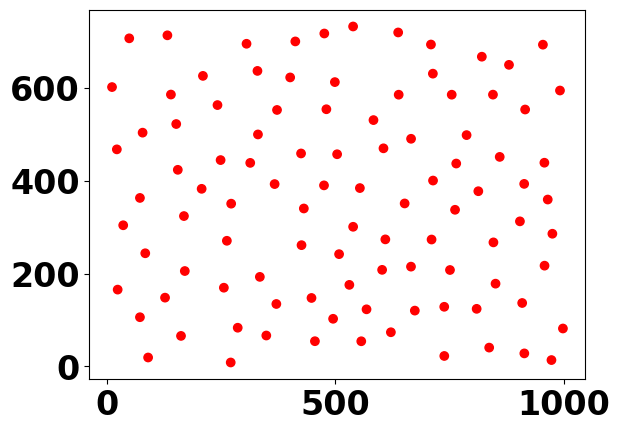

100 nodes.


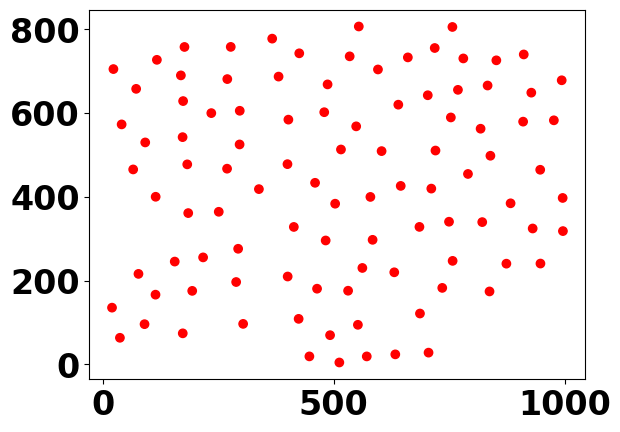

100 nodes.


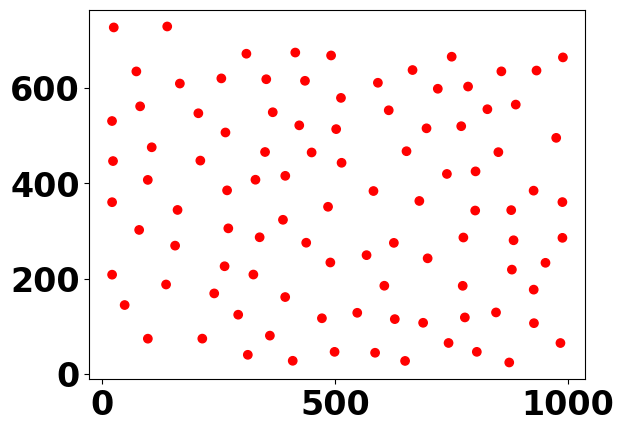

100 nodes.


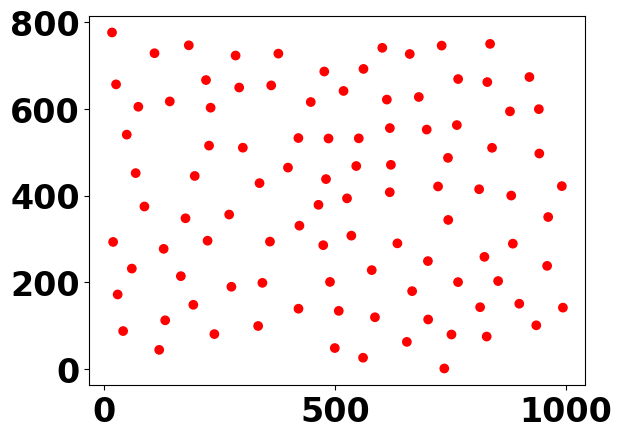

In [22]:
mapAreas = [8000]

nodeCounts = [20,50,100]

minDistanceM = 60
maxDistanceM = 100

genTimes = 10

def runGen():
    networkMapNames = []
    nodeMaps = {}
    
    for mapArea in mapAreas:
        mapWidthM = mapArea
        mapHeightM = mapArea
    
        for nodeCount in nodeCounts:
            
            for i in range (0, genTimes):
                nodeMap = genMap(mapWidthM, mapHeightM, nodeCount, minDistanceM, maxDistanceM)
                
                if debug:
                    for i in range(0, len(nodeMap)):
                        for j in range(0, len(nodeMap)):
                            if i == j:
                                continue
                            dist = sqrt( (nodeMap[i]['x'] - nodeMap[j]['x'])**2 + (nodeMap[i]['y'] - nodeMap[j]['y'])**2 )
                            if dist < minDistanceM:
                                print('ERROR - dist=' + str(dist))


                networkMapName = 'DADCA_ACK_n' + str(nodeCount) + '_' + 'a' + str(mapArea) + 'm2_' + str(i)
                networkMapNames.append(networkMapName)
                nodeMaps[networkMapName] = nodeMap
                saveNedFile(networkMapName + '.ned', networkMapName, nodeMap, mapHeightM)
                df = pd.DataFrame(data=reversed(nodeMap))
                colors = {'default':'red'}

                plt.scatter(df['x'], df['y'], c=df['mode'].map(colors))
                plt.show()
    
    saveIniFile(networkMapNames, nodeMaps)
    
runGen()